# Perform KNN from scratch and with the library and plot the results. Use random generated datapoints and make_blobs dataset of sklearn.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode
from sklearn import datasets

In [2]:
M,K=datasets.make_blobs(n_samples=480, n_features=2, random_state=36)

In [3]:
data=pd.DataFrame(M,columns=["Group1","Group2"])
data["Target"]=K

In [4]:
data

,Group1,Group2,Target
0,7.262361,-1.891153,2
1,5.241410,-2.422408,2
2,4.904409,-2.072324,2
3,10.761313,-6.287353,1
4,10.255755,-6.683946,1
...,...,...,...
475,7.767743,-3.767323,2
476,3.753715,0.705328,0
477,9.490689,-8.489793,1
478,5.690157,1.474449,0


In [5]:
def knn(point,data):
    distance=[]
    for i in data:
        sumn=0
        for j in range(len(data[0])):
            sumn+=(i[j]-point[j])**2
        distance.append(np.sqrt(sumn))
    return distance

dis=knn((0,0),M)
data1=data.copy()
data1["Distance"]=dis
data1.sort_values('Distance',inplace=True)
data1.head(10)


,Group1,Group2,Target,Distance
288,2.373009,1.779641,0,2.966192
304,2.958410,1.071423,0,3.146448
88,3.266984,-0.010009,0,3.267000
12,2.405282,2.306897,0,3.332740
282,2.972085,1.734875,0,3.441378
171,2.821108,2.101718,0,3.517935
453,2.876282,2.033364,0,3.522438
458,3.365249,1.085095,0,3.535863
64,2.992490,1.987639,0,3.592451
257,3.583825,0.407939,0,3.606967


In [6]:
k=9
a=data1["Target"][:k].values
print("Class : ",mode(a))

Class :  0


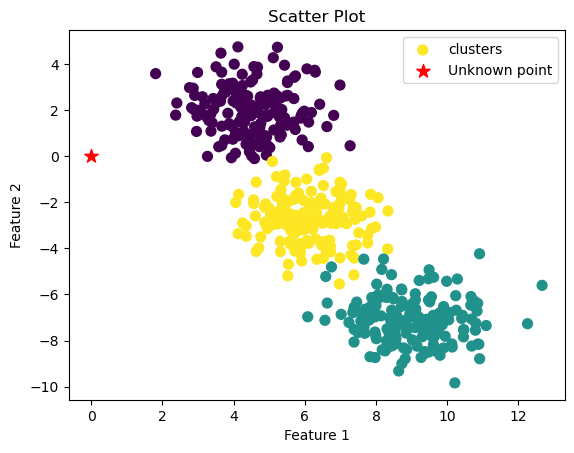

In [7]:
plt.title("Scatter Plot")
plt.scatter(M[:,0],M[:,1],c=K,cmap='viridis', s=50)
plt.scatter(0,0,marker="*",color="red",s=100,label="Unknown point")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(("clusters","Unknown point"))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(data, K, test_size=0.33, random_state=42)

In [10]:
error_rate=[]
for i in range(1,10):
    dx=KNeighborsClassifier(n_neighbors=i)
    dx.fit(xtrain,ytrain)
    prediction=dx.predict(xtest)
    error_rate.append(np.mean(prediction != ytest))
    

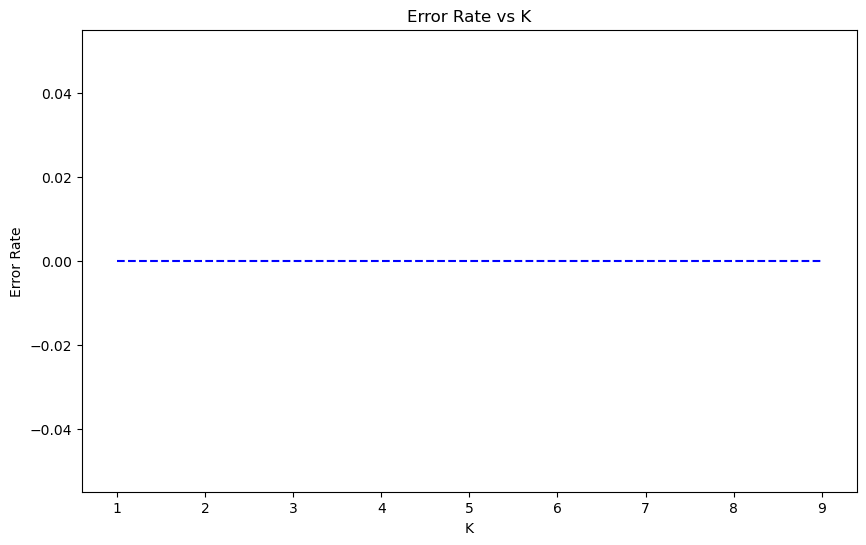

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed')
plt.title("Error Rate vs K")
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [13]:
MK=KNeighborsClassifier(n_neighbors=3)
MK.fit(xtrain,ytrain)
predicted=MK.predict(xtest)

In [14]:
print(classification_report(ytest,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        50

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



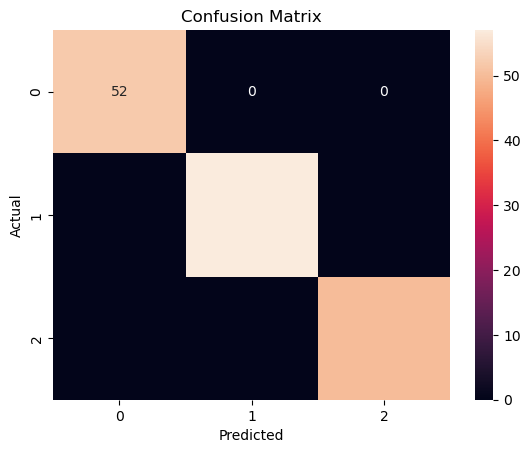

In [15]:
sns.heatmap(confusion_matrix(ytest,predicted),annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
accuracy=accuracy_score(ytest,predicted)